In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

appl_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/applications.csv")
props_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/all_properties.csv")

# matching_df = pd.read_csv("/mnt/c/Users/Amro/Desktop/DOI LISTS/Processing Batches - results/")

doi_pub_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/DOI_Publisher.csv")

ws_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/water_stability.csv")

ws24_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/features_and_labels.csv")

ws24full_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/labels.csv")

In [6]:
ws_df.loc[ws_df["Ref Code"]=="AWIBAL"]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
1132,1132,277,277,Lu-ATA@RT,AWIBAL,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/acs.cgd.6b00274


In [7]:
plt.rcParams['svg.fonttype'] = 'none'

## Examining Property Extraction

### Number of Properties per MOF before Filtering

In [23]:
props_df = props_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis = 1).merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)

props_df.head()

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Yield,52,%,based on Cd,Cd(L2(SCN)2.Yield 52% (based on Cd).,10.1021/cg900515j,ACS
1,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Carbon,27.28,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
2,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Carbon,27.35,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS
3,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Calculated for Hydrogen,2.05,%,Not specified,Elemental analysis calcd (%) for C10H9CdN5S4: ...,10.1021/cg900515j,ACS
4,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Elemental Analysis Found for Hydrogen,2.19,%,Not specified,"Found: C 27.35, H 2.19, N 15.97.",10.1021/cg900515j,ACS


In [24]:
props_per_mof = props_df[["Ref Code", "Property"]].groupby("Ref Code").count()
average_PPM = props_per_mof["Property"].mean()

print(f"Average properties per CSD Entry: {average_PPM:.1f}")

Average properties per CSD Entry: 10.4


In [25]:
props_df[props_df["Property"].apply(lambda x: "gof" in x.lower())]

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher
427,[NH2(CH3)2][Nd(MDIP)(H2O)]<|>compound 2,RAVCUO,GOF on F2,1.103,NaN,NaN,"""GOF on F2 1.103""",10.1021/cg201283a,ACS
713,"Compound 3a<|>Cd2(4-tp-3-lad)(1,4-BDC)2",IBIXID,GOF,1.153,NaN,NaN,GOF 1.153,10.1021/acs.cgd.6b01728,ACS
1276,[TbAg(Hbic)2(C2O4)H2O]·2H2O<|>complex 3,QURYUY,GOF,1.174,NaN,None specified,GOF 1.174,10.1021/cg900571v,ACS
2383,Cu3(MedeaH)2(oba)2(H2O)<|>compound 8,LAZSIQ,GOF on F2,1.037,none,none,"""GOF on F 2 1.037""",10.1021/cg300434k,ACS
2610,[Cd(L1)(L5)]∞<|>4,MEFJUD,GOF,1.06,NaN,NaN,"""Crystallographic Data and Structure Refinemen...",10.1021/cg050336q,ACS
...,...,...,...,...,...,...,...,...,...
150341,AgOtf(PMP-41)<|>compound 5,DOSRAF,Goodness-of-fit (GOF) on F²,1.030,NaN,110 K,"""Goodness-of-fit (GOF) on F 2 1.030""",10.1016/j.ica.2008.04.032,Elsevier
150623,[Cd(mtaa)(H2O)]n<|>complex 2,XAKRUY,Goodness-of-Fit (GOF) on F²,1.055,NaN,NaN,Goodness-of-fit (GOF) on F² 1.055,10.1016/j.poly.2011.11.036,Elsevier
150748,"μ5-5-(2-(2-Hydroxyethoxy)ethoxy)benzene-1,3-di...",OQANIE,Goodness-of-fit (GOF),1.295,NaN,NaN,Crystallographic data for 4. | Goodness-of-fit...,10.1016/j.ica.2010.06.022,Elsevier
151651,{[Cu(bptc)0.5(H2O)]·H2O}n<|>complex 2,JOJGIA,Goodness-of-fit (GOF),1.061,NaN,NaN,Complexes 1 2 3 Chemical formula C14H8CdN2O9 C...,10.1016/j.ica.2014.03.023,Elsevier


### Properties per MOF for Each Publisher

<Axes: xlabel='Publisher'>

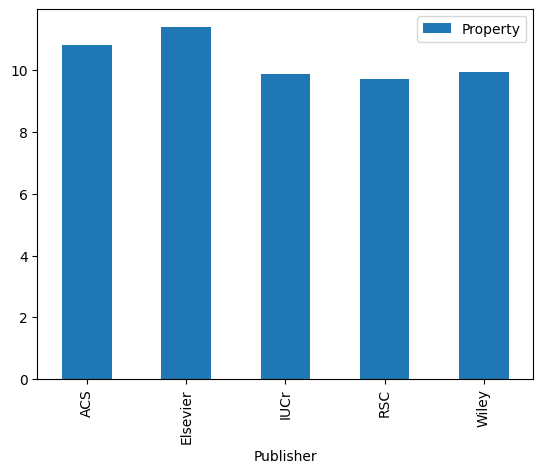

In [26]:
props_per_mof = props_df[["Ref Code", "Property", "Publisher"]].groupby(["Ref Code", "Publisher"]).count().groupby("Publisher").mean()

props_per_mof.plot(kind="bar")

### Distribution of Properties found

In [27]:
dist_props = props_df
dist_props["Property"] = dist_props["Property"].apply(lambda x: x.lower())
dist_props = props_df[["Ref Code", "Property"]].groupby("Property").count().sort_values("Ref Code", ascending=False)

dist_props.reset_index(inplace=True)

dist_props.head()

,Property,Ref Code
0,space group,10390
1,crystal system,9490
2,cell volume,5547
3,density,4869
4,thermal stability,3972


In [28]:
uptake_df = dist_props[dist_props["Property"].apply(lambda x: "uptake" in x.lower())]

In [29]:
len(dist_props)

25785

Text(0.5, 1.0, 'Distribution of extracted properties')

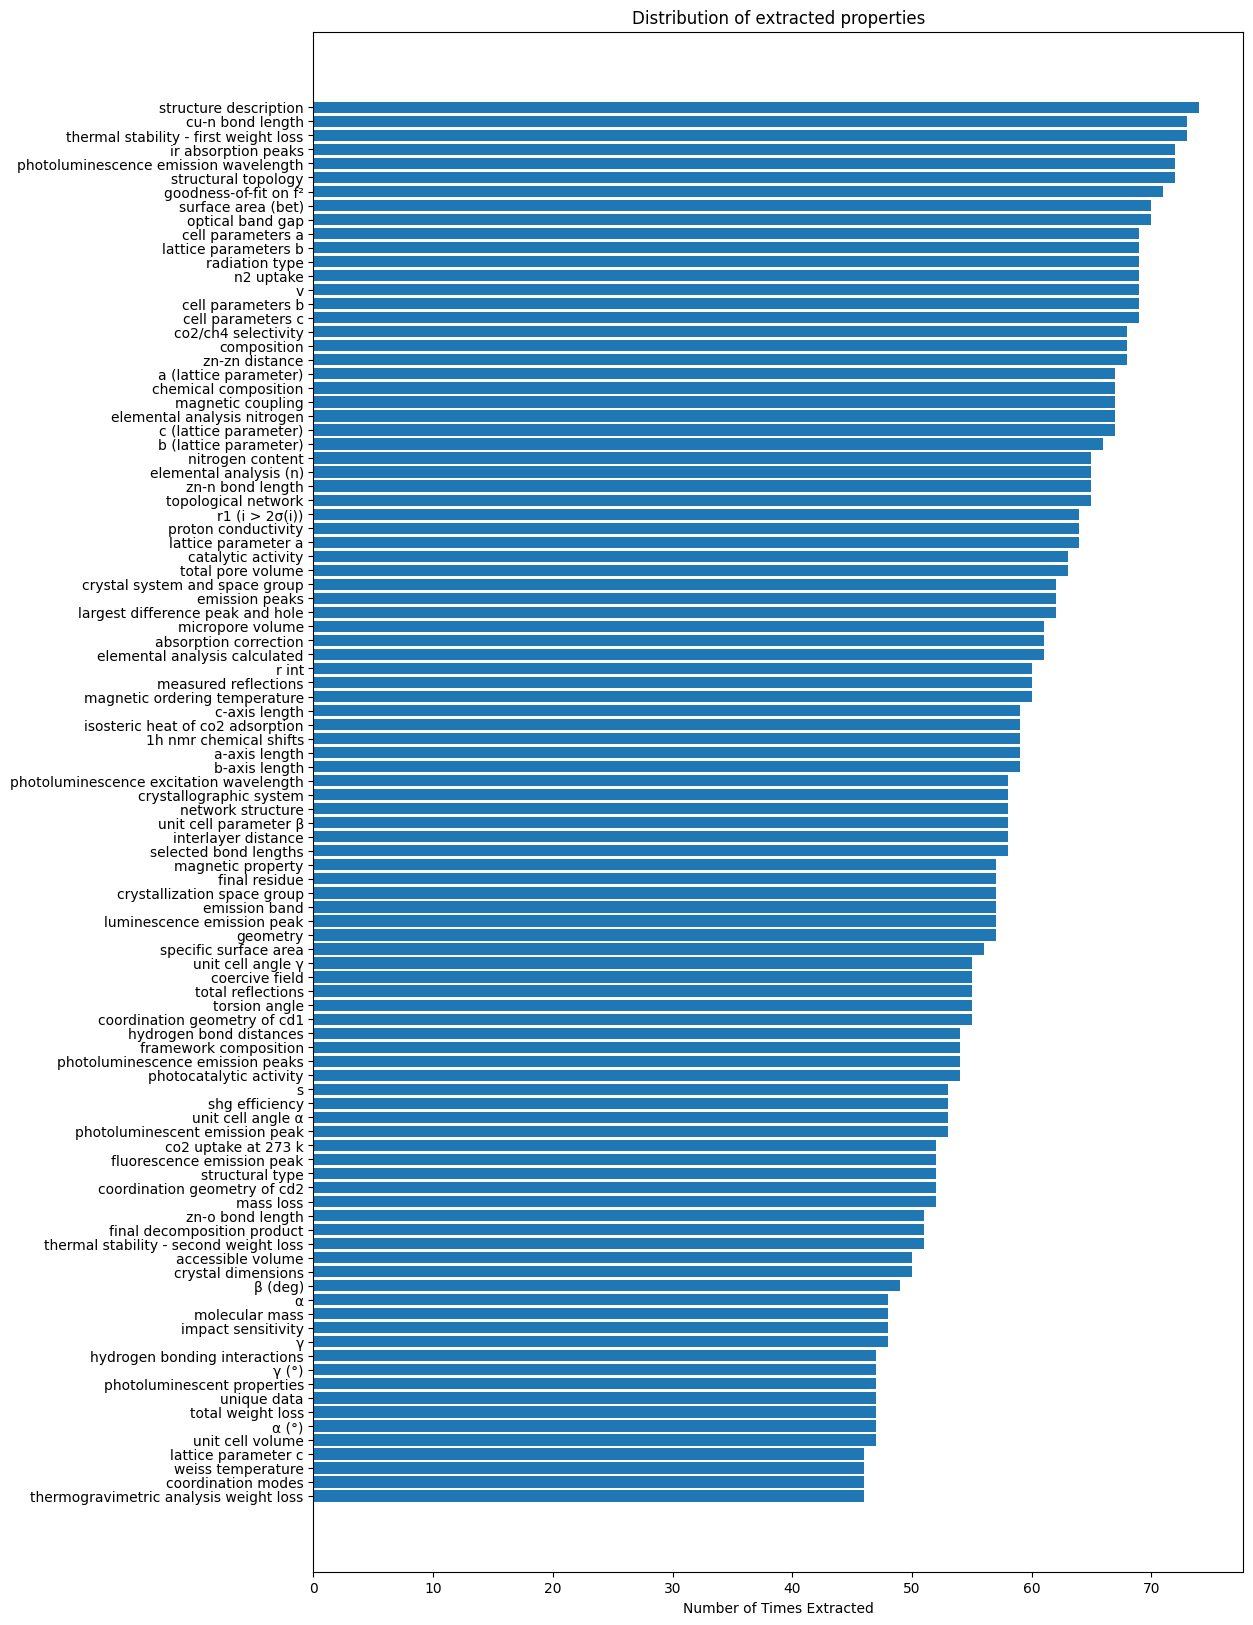

In [30]:
fig, ax = plt.subplots(figsize=(12, 20))

labels = list(dist_props["Property"].iloc[200:300])
pos = np.arange(len(labels))

values = dist_props["Ref Code"].iloc[200:300]

ax.barh(pos, values, align='center')
ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Number of Times Extracted")
ax.set_title("Distribution of extracted properties")

### Attempting to Cluster using Embeddings from text-embedding-ada-002	

In [10]:
from multiprocess import Pool
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [11]:
dist_props["Embedding"] = pd.Series(np.zeros(len(dist_props)))

dist_props.head()

,Property,Ref Code,Embedding
0,space group,10390,0.0
1,crystal system,9490,0.0
2,cell volume,5547,0.0
3,density,4869,0.0
4,thermal stability,3972,0.0


In [12]:
len(dist_props)

25785

In [36]:
from openai import OpenAI

with open(".apikey", 'r') as f:
    client = OpenAI(api_key=f.read())

def embed_properties(start: int, end: int):
    ret_embeddings = dist_props[["Property", "Embedding"]][start:end].copy(deep=True)
    
    ret_embeddings["Embedding"] = ret_embeddings["Property"].apply(lambda x: client.embeddings.create(input=x.lower(),
                                                                            model="text-embedding-ada-002").data[0].embedding)
    

    return ret_embeddings

# with Pool(processes=8) as pool:
#     params = [(i*len(dist_props)//8, (i+1)*len(dist_props)//8) for i in range(8)]
#     results = [pool.apply_async(embed_properties, p) for p in params]

# final = pd.concat([r.get() for r in results])

dist_props["Embedding"][:2000] = dist_props["Property"][:2000].apply(lambda x: 
                                                        client.embeddings.create(input=x.lower(),
                                                                                model="text-embedding-ada-002").data[0].embedding)

/tmp/ipykernel_36864/1243535933.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dist_props["Embedding"][:2000] = dist_props["Property"][:2000].apply(lambda x:
/tmp/ipykernel_36864/1243535933.py:21: SettingWithCopyWarning: 
A value is tr

In [14]:
embeddings = np.array(list(dist_props["Embedding"][:2000]))

KeyError: 'Embedding'

In [138]:
props_pca = PCA(n_components=100).fit_transform(embeddings)

props_svd = TruncatedSVD(100).fit_transform(embeddings)

In [166]:
prop_tsne = TSNE(n_components=2, perplexity=50, learning_rate='auto', init='random')
prop_tsne = prop_tsne.fit_transform(embeddings)

prop_pca_tsne = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='random')
prop_pca_tsne = prop_pca_tsne.fit_transform(props_pca)

prop_svd_tsne = TSNE(n_components=2, perplexity=5, learning_rate='auto', init='random')
prop_svd_tsne = prop_svd_tsne.fit_transform(props_svd)

Text(0.5, 1.0, 'SVD Then TSNE')

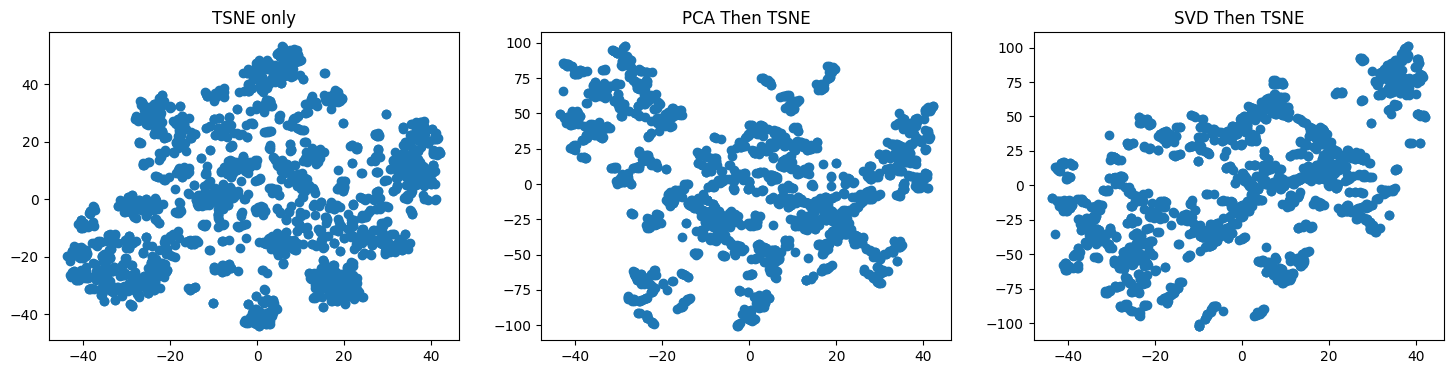

In [167]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

ax[0].scatter(x=prop_tsne[:, 0], y=prop_tsne[:, 1])
ax[0].set_title("TSNE only")

ax[1].scatter(x=prop_tsne[:, 0], y=prop_pca_tsne[:, 1])
ax[1].set_title("PCA Then TSNE")

ax[2].scatter(x=prop_tsne[:, 0], y=prop_svd_tsne[:, 1])
ax[2].set_title("SVD Then TSNE")

In [168]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [197]:
k = 20
model = GaussianMixture(k) # KMeans(k)

model.fit(embeddings)

clusters = model.predict(embeddings)

Text(0.5, 1.0, 'TSNE only')

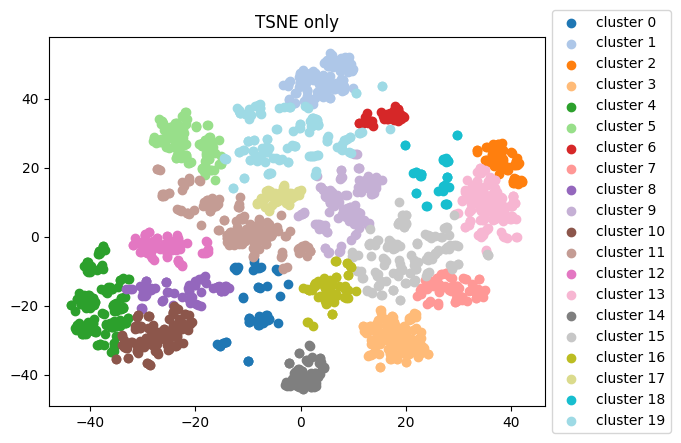

In [199]:
fig, ax = plt.subplots()

cmap = plt.colormaps.get("tab20")
colors = [cmap(i) for i in range(k)]

for i in range(k):
    ax.scatter(x=prop_tsne[clusters==i, 0], y=prop_tsne[clusters==i, 1], c=[colors[i]], label=f"cluster {i}")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("TSNE only")

In [273]:
dist_props[:2000].iloc[clusters==12].head(20)

,Property,Ref Code,Embedding
14,topology,1114,"[0.00863999966531992, 0.00532472925260663, -0...."
53,pore size,256,"[0.01622920110821724, 0.007310763001441956, 0...."
80,synthesis temperature,174,"[-0.013911960646510124, -0.005205788183957338,..."
101,unit cell dimensions a,141,"[0.0066070035099983215, 0.014118337072432041, ..."
127,synthesis yield,118,"[-0.010375593788921833, -0.021728500723838806,..."
128,magnetic susceptibility at 300 k,117,"[-0.01361521054059267, -0.0085103465244174, 0...."
216,co2/ch4 selectivity,68,"[0.011390225030481815, 0.002408150350674987, 0..."
251,unit cell parameter β,58,"[-0.01885814405977726, -0.0017987873870879412,..."
259,geometry,57,"[0.008493771776556969, 0.002396757248789072, 0..."
365,point symbol,37,"[-0.036507006734609604, -0.008050920441746712,..."


## Filtering properties

In [2]:
from thefuzz import process, fuzz

In [3]:
fuzz.ratio("Stability temperature", "Synthesis temperature")

71

In [4]:
properties_dict = {
    "Space Group": ["Space Group", "crystallographic space group"],
    "Crystal System": ["Crystal System"],
    "Cell Volume": ["Cell Volume", "unit cell volume", "Crystal System Volume"],
    "Density": ["Density", "Calculated Density", "density calculated", "dc", "dcalc", "d calc", "d calcd", "dcalcd"],
    "Thermal Stability": ["Thermal Stability", "Stability temperature", "decomposition temperature"],
    "Chemical Formula": ["Chemical Formula", "Formula", "Molecular Formula"],
    "Formula Weight": ["Formula Weight", "Molecular Weight", "Formula Mass", "Molar Mass"],
    "Light Absorption Coefficient": ["Light Absorption Coefficient", "Absorption Coefficient"],
    "Topology": ["Topology", "framework topology", "network topology", "structural topology"],
    "Surface Area": ["Surface Area", "Lnagmuir surface area", "surface area langmuir", "surface area bet", "bet surface area"],
    "Magnetic Susceptibility": ["Magnetic Susceptibility", "Magnetic Susceptibility at room temperature", "Magnetic Susceptibility at 300 K"],
    "Magnetic Moment": ["Magnetic Moment", "effective magnetic moment"],
    "Pore Volume": ["Pore Volume", "Pore size"],
    "Pore Diameter": ["Pore Diameter"],
    "Porosity": ["Porosity"],
    "CO2 Uptake": ["co2 Uptake", "CO2 adsorption capacity", "carbon dioxide uptake", "CO2 Storage", "carbon dioxide storage", "carbon dioxide adsorption capacity"],
    "H2 uptake": ["h2 uptake", "h2 storage", "h2 adsorption", "hydrogen uptake", "hydrogen storage", "hydrogen adsorption"],
    "N2 uptake": ["n2 uptake", "n2 storage", "n2 adsorption", "nitrogen uptake", "nitrogen storage", "nitrogen adsorption"],
    "Weiss Constant": ["weiss constant"],
    "Curie Constant": ["curie constant"],
    "Color": ["color", "crystal color"],
    "Band Gap": ["band gap"],
    "Excitation Wavelength": ["excitation wavelength", "photoluminescent excitation wavelength", "emission excitation wavelength"],
    "Emission Wavelength": ["emission wavelength", "fluorescence emission wavelength", "fluorescence emission peak", "fluorescence emission maximum", "fluorescence maximum", "fluorescence peak", "photoluminescence emission wavelength", "photoluminescence emission maximum", "emission maximum", "photoluminescence emission peak", "photoluminescence maximum", "photoluminescence peak", "luminescence emission wavelength", "luminescence emission maximum", "emission peak", "luminescence emission peak", "luminescence maximum", "luminescence peak",],
    "Coordination Geometry": ["Coordination Geometry", "Coordination Environment", "coordination geometry of", "coordination geometry -"],
    "Coordination Number": ["Coordination number"],
    "Solvent-Accessible Volume": ["Solvent-accessible Volume", "Solvent Accessible Volume"],
    "Void Volume": ["void volume", "void space"],
    "Free Volume": ["free volume", "effective free volume"]
}
properties_dict["Remove"] = [
    "yield", "Synthesis yield",
    "bond angles",
    "angles",
    "unit cell angles",
    "bond distances",
    "hydrogen bond geometry",
    "unique reflections",
    "unit cell parameter", "unit cell dimension", "cell parameters",
    "lattice parameters",
    "ir spectrum", "ir spectroscopy", "ir data", "ir spectra peaks", "ir peaks", "ir absorption bands", "ft ir peaks",
    "elemental analysis (carbon)", "(hydrogen)", "(nitrogen)",
    "hydrogen bonds",
    "carbon content", "hydrogen content",
    "wavelength", "emission wavelength range",
    "photoluminescence", "photoluminescence emission maxima",
    "Luminescence",
    "emission peaks",
    "Coordination Mode",
    "Coordination Sphere",
    "Elemental analysis", "chemical formula weight", 
    "Elemental analysis - carbon", 'i2 desorption temperature', 'tliesst temperature',
    "Elemental analysis - hydrogen", 'reaction temperature', 'thermal stability ranking',
    "Elemental analysis - nitrogen", 'water stability', 'chemical stability',
    "c2h2 uptake", "c2h2 storage", "c2h2 adsorption", "hexane uptake", "cyclohexane storage", "c2h4 adsorption",
    "c2h4 uptake", "c2h4 storage", "ch3oh adsorption", "coordination geometry angles", 'molecular weight control',
    "emission spectra", "emission maxima", "emission peaks", 'photoluminescence emission peaks', 'fluorescence emission maxima',
    "photoluminescence emission intensity", "emission intensity", "photoluminescence emission wavelengths", "luminescent emission band maxima",
    "photoluminescent emission wavelengths", 'luminescence emission maxima', 'luminescence emission peaks', 'emission maximum wavelengths',
    'fluorescence emission bands', 'luminescence wavelengths', 'photoluminescence emission intensity', 'photoluminescence emission range',
    'photoluminescence excitation peaks', 'magnetic susceptibility decrease', 'magnetic susceptibility maximum temperature',
    'magnetic susceptibility increase', 'ac susceptibility', 'magnetic susceptibility model', 'solvent-accessible void change',
    'solvent-accessible ratio',
]

In [5]:
def filter_and_standardize(df, mapper=properties_dict, threshold=80):
    used_keys = []

    df_copy = df.copy(deep=True)
    df_copy["Original Property Name"] = df_copy["Property"]
    current_code = df_copy.loc[0, "Ref Code"]

    for j in range(len(df_copy)):
        if current_code.lower() != df_copy.loc[j, "Ref Code"].lower():
            used_keys = []
        
        maximum_match = "none"
        maximum_score = 0
        for k, v in mapper.items():
            if k in used_keys:
                continue

            for i in v:
                score = fuzz.ratio(df_copy.loc[j, "Property"].lower(), i.lower())

                if score >= threshold and score > maximum_score:
                    maximum_score = score
                    maximum_match = k
        
        if maximum_score >= threshold:
            if maximum_match.lower() != "remove":
                used_keys.append(maximum_match)
        
        df_copy.loc[j, "Property"] = maximum_match

    
    return df_copy
    

In [147]:
filtered_props_new_df = filter_and_standardize(props_df)

In [148]:
final_props_df = filtered_props_new_df[filtered_props_new_df["Property"] != "none"]
final_props_df = final_props_df[final_props_df["Property"] != "Remove"]

In [149]:
final_props_df.to_csv("final_filtered_props_v2.csv")

In [6]:
correct_ws_df = pd.read_csv("Fixed_Water_Stability.csv").drop("Unnamed: 0", axis=1)

correct_ws_df = correct_ws_df.merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)
correct_ws_df.head(5)

correct_ws_df["Property"] = pd.Series(["Water Stability" for i in range(len(correct_ws_df))])

In [7]:
final_props_df2 = pd.read_csv("final_filtered_props_v2.csv")
final_props_df2 = pd.concat([final_props_df2, correct_ws_df[correct_ws_df["Value"] != "Not provided"]])

In [8]:
len(final_props_df2["Reference"].unique())

9196

In [9]:
final_props_df2["Property"].unique()

array(['Crystal System', 'Space Group', 'Coordination Geometry',
       'Cell Volume', 'Topology', 'Formula Weight', 'Density',
       'Light Absorption Coefficient', 'Thermal Stability',
       'Emission Wavelength', 'Excitation Wavelength', 'Chemical Formula',
       'Magnetic Susceptibility', 'Coordination Number',
       'Solvent-Accessible Volume', 'Pore Volume', 'Surface Area',
       'Void Volume', 'Pore Diameter', 'CO2 Uptake', 'Weiss Constant',
       'Curie Constant', 'Porosity', 'N2 uptake', 'H2 uptake', 'Color',
       'Magnetic Moment', 'Free Volume', 'Band Gap', 'Water Stability'],
      dtype=object)

In [135]:
final_props_df2.loc[final_props_df2["Property"]=="solvent-accessible volume", "Original Property Name"].unique()

array(['solvent accessible volume', 'solvent-accessible voids',
       'solvent-accessible volume', 'solvent accessible void',
       'solvent accessible voids', 'solvent-accessible void space',
       'guest accessible volume', 'solvent accessible void volume',
       'total accessible volume', 'solvent accessible volume percentage',
       'solvent-accessible void volume', 'solvent-accessible void',
       'solvent accessible space', 'solvent accessible volume (sav)',
       'accessible volume', 'solvent-accessible volume/cell',
       'solvent accessible void space', 'solvent accessible void area',
       'solvent-accessible free volume',
       'solvent-accessible volume percentage',
       'effective solvent accessible volume',
       'free solvent-accessible volume', 'solvent accessible pore volume',
       'potential solvent-accessible volume',
       'total solvent-accessible volume',
       'potential solvent accessible volume', 'solvent-accessible region',
       'solvent-acc

In [132]:
final_props_df2.loc[final_props_df2["Original Property Name"]=='magnetic susceptibility maximum temperature']

,Unnamed: 0,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,Publisher,Original Property Name
1516,3714.0,[Co2(bpm)(H2O)2(CO3)(OH)]NO3·4H2O<|>compound 1,HOKGUJ,magnetic susceptibility,11.5,K,Not specified,The susceptibility curve shows the presence of...,10.1021/ic981323n,ACS,magnetic susceptibility maximum temperature
8100,19691.0,Mn2(H2O)[O2C(CH2)3CO2]2<|>MnDC-3,EHISIX,magnetic susceptibility,13,K,Not specified,"""For all MnDC-n compounds it appears that the ...",10.1021/cm010219s,ACS,magnetic susceptibility maximum temperature
10449,25268.0,Mn2(bpm)(N3)4<|>compound 3,NAJSUM02,magnetic susceptibility,12,K,NaN,The thermal variation of the molar magnetic su...,10.1021/ic960969h,ACS,magnetic susceptibility maximum temperature
15438,37394.0,[Co(μ-ox)(2-ampy)2]<|>compound 1,UCOYOA,magnetic susceptibility,27,K,Magnetic field of 1000 G,The χM curves increase when the compounds are ...,10.1021/ic0103401,ACS,magnetic susceptibility maximum temperature
18159,43805.0,(MePh3P)Mn(dca)3<|>3,QIJLAW,magnetic susceptibility,3,K,NaN,"""Taking complex5d,k3as an example, we see in F...",10.1021/ic000978x,ACS,magnetic susceptibility maximum temperature
18323,44160.0,[Cu(F-pymo)2(H2O)1.25]<|>1<|>1',JOCPIB,magnetic susceptibility,60,K,High-temperature behavior,The high-temperature behavior of the dc magnet...,10.1021/ja078074z,ACS,magnetic susceptibility maximum temperature
23043,56251.0,[Ni(bipy)(N3)2]n<|>compound 1,NAYHUQ,magnetic susceptibility,8.5,K,Not specified,The susceptibility curve (inset of Fig. 3) inc...,10.1039/a701219e,RSC,magnetic susceptibility maximum temperature
23454,57476.0,[{Mn(minc)2(N3)2}n],PAQJOG,magnetic susceptibility,24,K,NaN,Plots of the molar magnetic susceptibility and...,10.1039/a702214j,RSC,magnetic susceptibility maximum temperature
24719,60639.0,"{Cu2(2,5-Me2pyz)[N(CN)2]4}n<|>1",XIZPIF,magnetic susceptibility,8.8,K,As the temperature is lowered.,"wM increases as the temperature is lowered, re...",10.1039/b111012h,RSC,magnetic susceptibility maximum temperature
31754,76897.0,[Mn2(hfipbb)2(H2hfipbb)]<|>compound 2,VEGYIR,magnetic susceptibility,2.8,K,Very low temperature,"""Concerning compounds [M2(hfipbb)2(H2hfipbb)] ...",10.1039/c2ce06563k,RSC,magnetic susceptibility maximum temperature


#### Comparing Kulic et al to ChemUnity

In [63]:
temp_units = ['°C', 'K', '°C, %', '%, °C', 'percentage, °C', 'wt %, °C', '% weight loss, uC', 
              'Degrees Celsius', 'uC', 'C', 'degrees Celsius', '1C', 'percent, degree Celsius', 
              '°C, °C']

In [96]:
chemunity = final_props_df2[final_props_df2["Property"] == "thermal stability"]
kulic = pd.read_csv("/mnt/c/Users/Amro/Downloads/full_TSD_data.csv")[["refcode", "T (C)", "doi"]]

chem_kulic = chemunity.merge(kulic, how="inner", right_on="refcode", left_on="Ref Code")

In [44]:
chem_kulic.loc[chem_kulic["Units"].apply(lambda x: x in temp_units), ["Ref Code", "Property", "Value", "Units", "T (C)"]]

,Ref Code,Property,Value,Units,T (C)


### Distribution of Filtered Properties

In [10]:
dist_fil_props = final_props_df2
dist_fil_props = final_props_df2[["Ref Code", "Property"]].groupby("Property").count().sort_values("Ref Code", ascending=False)

dist_fil_props.reset_index(inplace=True)

dist_fil_props.head(15)

,Property,Ref Code
0,Space Group,10575
1,Crystal System,9491
2,Coordination Geometry,5907
3,Cell Volume,5678
4,Density,5309
5,Formula Weight,4673
6,Thermal Stability,4164
7,Chemical Formula,4109
8,Light Absorption Coefficient,2122
9,Emission Wavelength,1929


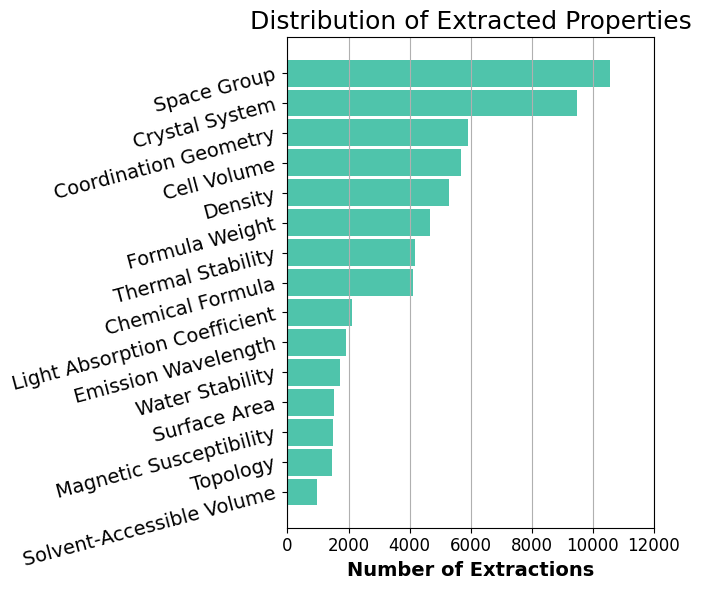

In [11]:
fig, ax = plt.subplots(figsize=(7, 6))

top_k = 15

labels = [dist_fil_props.loc[i, "Property"] for i in range(top_k)]
pos = np.arange(len(labels))

values = [dist_fil_props.loc[i, "Ref Code"] for i in range(top_k)]

ax.barh(pos, values, align='center', height=0.9, color="#4fc4ab")
ax.set_yticks(pos, labels=labels, rotation=15, fontsize=14)
ax.invert_yaxis()
ax.set_xlabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='x', which='major')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), fontsize=12)
ax.set_title("Distribution of Extracted Properties", fontsize=18)

plt.tight_layout()
plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Properties.svg")

In [172]:
len(final_props_df2)

66180

### Properties Per Publisher

In [443]:
exclude = ["space group", "crystal system", "coordination geometry", "formula weight", "chemical formula", "topology", "coordination number"]

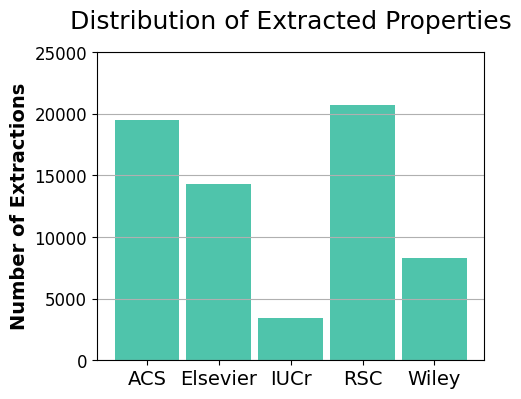

In [607]:
publisher_props_df = final_props_df2[["Ref Code", "Publisher"]].groupby("Publisher").count().reset_index()

fig, ax = plt.subplots(figsize=(5, 4))

labels = [i for i in publisher_props_df["Publisher"]]
pos = np.arange(len(labels))

values = publisher_props_df["Ref Code"]

ax.bar(pos, values, align='center', width=0.9, color="#4fc4ab")
ax.set_xticks(pos, labels=labels, fontsize=14)
ax.set_ylabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='y', which='major')
ax.set_yticks(np.linspace(0,25000,6), [f"{i:0n}" for i in np.linspace(0,25000,6)], fontsize=12)
ax.set_title("Distribution of Extracted Properties", fontsize=18, y=1.05)


plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Properties_Publisher.svg")

## Examining Application Extraction

### Application per MOF for Each Publisher

In [207]:
appl_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOF Name,Ref Code,Application,Recommendation,Justification,Source
0,0,0.0,0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Not Provided,Not Provided,Not Provided,10.1021/cg900515j
1,1,1.0,1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Solid-state lighting (SSL) applications that a...,Investigated,Metal–organic frameworks are a class of materi...,10.1021/cm500700z
2,2,2.0,2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Not Provided,Not Provided,Not Provided,10.1021/ic0201856
3,3,3.0,3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Not Provided,Not Provided,Not Provided,10.1021/cg701232n
4,4,4.0,4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Not Provided,Not Provided,The documents do not mention any specific appl...,10.1021/cg901327m


In [208]:
appl_df = appl_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis = 1).merge(doi_pub_df, how='left', right_on="DOI", left_on="Source").drop("DOI", axis=1)

appl_df.head()

,MOF Name,Ref Code,Application,Recommendation,Justification,Source,Publisher
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Not Provided,Not Provided,Not Provided,10.1021/cg900515j,ACS
1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Solid-state lighting (SSL) applications that a...,Investigated,Metal–organic frameworks are a class of materi...,10.1021/cm500700z,ACS
2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Not Provided,Not Provided,Not Provided,10.1021/ic0201856,ACS
3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Not Provided,Not Provided,Not Provided,10.1021/cg701232n,ACS
4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Not Provided,Not Provided,The documents do not mention any specific appl...,10.1021/cg901327m,ACS


### Applications per MOF

In [209]:
appl_per_mof = appl_df[["Ref Code", "Application"]].groupby("Ref Code").count()
average_APM = appl_per_mof["Application"].mean()

print(f"Average properties per CSD Entry: {average_APM:.1f}")

Average properties per CSD Entry: 1.1


<Axes: xlabel='Publisher'>

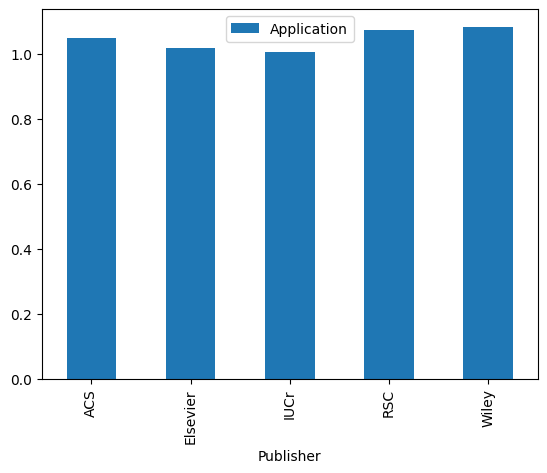

In [ ]:
appl_per_mof = appl_df[["Ref Code", "Application", "Publisher"]].groupby(["Ref Code", "Publisher"]).count().groupby("Publisher").mean()

appl_per_mof.plot(kind="bar")

### Distribution of Applications Found

In [210]:
dist_appl = appl_df
dist_appl["Application"] = dist_appl["Application"].apply(lambda x: x.lower())
dist_appl = appl_df[["Ref Code", "Application"]].groupby("Application").count().sort_values("Ref Code", ascending=False)

dist_appl.reset_index(inplace=True)

dist_appl.head()

,Application,Ref Code
0,not provided,9557
1,hydrogen storage,294
2,luminescent materials,172
3,luminescence,139
4,co2 adsorption,115


Text(0.5, 1.0, 'Distribution of extracted properties')

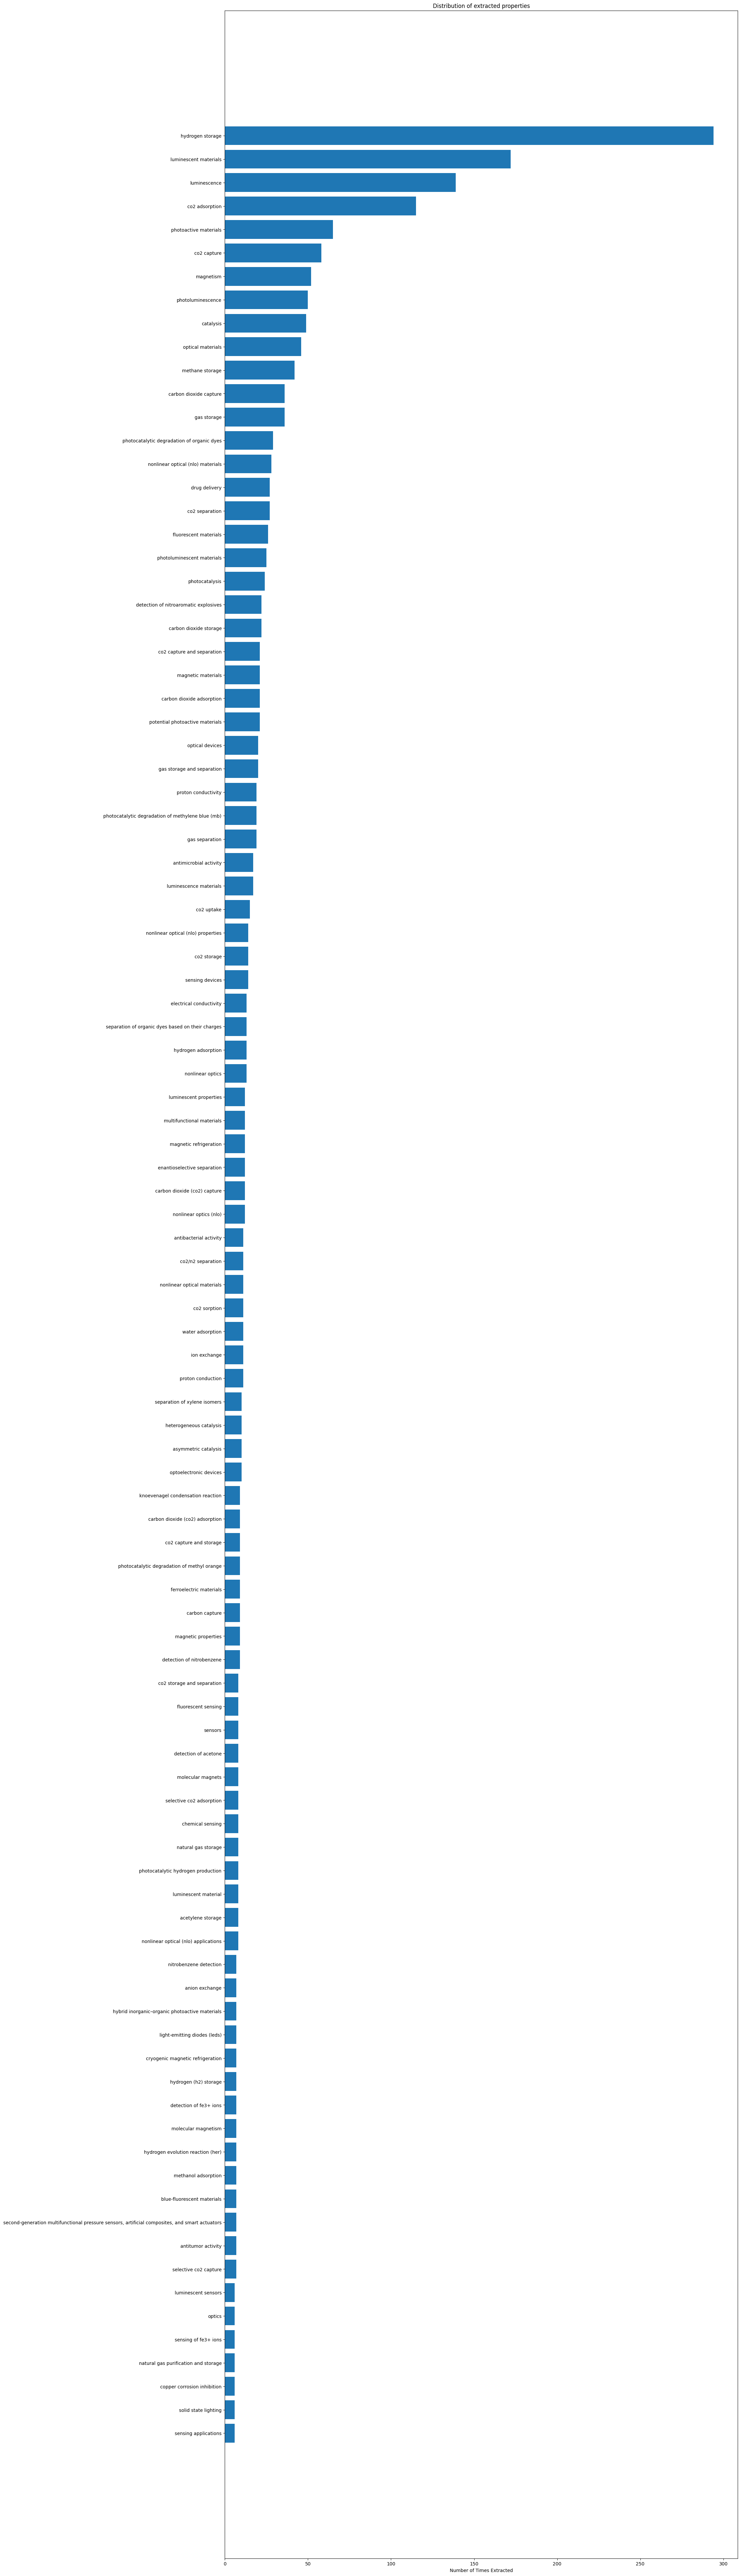

In [211]:
fig, ax = plt.subplots(figsize=(20, 100))

labels = list(dist_appl["Application"].iloc[1:100])
pos = np.arange(len(labels))

values = dist_appl["Ref Code"].iloc[1:100]

ax.barh(pos, values, align='center')
ax.set_yticks(pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Number of Times Extracted")
ax.set_title("Distribution of extracted properties")

### Applications After Filtering

In [52]:
appl_filtered_df = pd.read_csv("applications_filtered.csv")
appl_filtered_df = appl_filtered_df.merge(doi_pub_df, how="left", right_on="DOI", left_on="Source")

In [53]:
dist_appl_df = appl_filtered_df
dist_appl_df["Application"] = dist_appl_df["Application"].apply(lambda x: x.lower())
dist_appl_df = appl_filtered_df[["Ref Code", "Application"]].groupby("Application").count().sort_values("Ref Code", ascending=False)

dist_appl_df.reset_index(inplace=True)

dist_appl_df.head()

,Application,Ref Code
0,photoluminescence,587
1,co2 storage,388
2,h2 storage,373
3,gas separation,189
4,catalysis,115


In [55]:
len(appl_filtered_df)

2007

In [57]:
len(appl_df)

15962

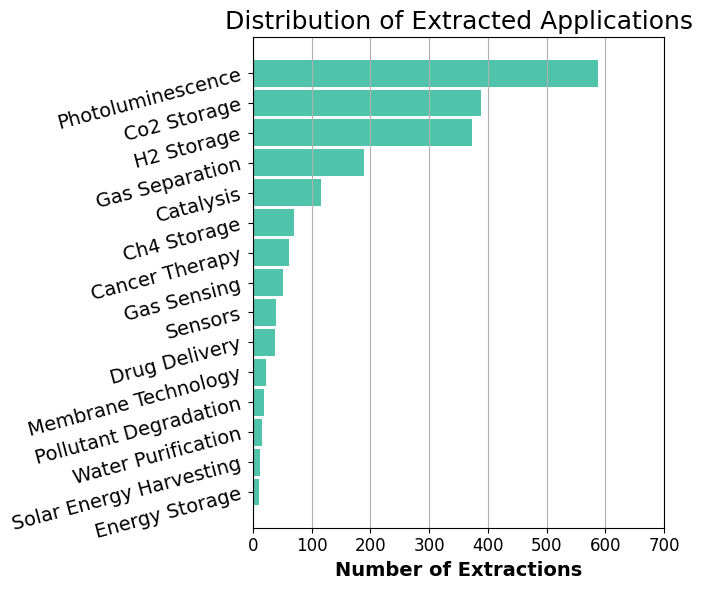

In [54]:
fig, ax = plt.subplots(figsize=(7, 6))

top_k = 15

labels = [dist_appl_df.loc[i, "Application"].title() for i in range(top_k)]
pos = np.arange(len(labels))

values = [dist_appl_df.loc[i, "Ref Code"] for i in range(top_k)]

ax.barh(pos, values, align='center', height=0.9, color="#4fc4ab")
ax.set_yticks(pos, labels=labels, rotation=15, fontsize=14)
ax.invert_yaxis()
ax.set_xlabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='x', which='major')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), fontsize=12)
ax.set_title("Distribution of Extracted Applications", fontsize=18)

plt.tight_layout()
plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Applications.svg")

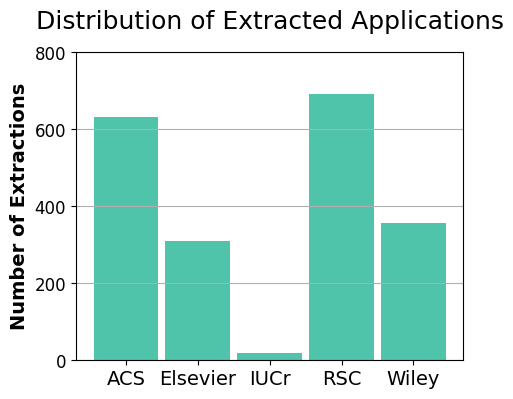

In [619]:
appl_publi_df = appl_filtered_df[["Ref Code", "Publisher"]].groupby("Publisher").count().reset_index()

fig, ax = plt.subplots(figsize=(5, 4))

labels = [i for i in appl_publi_df["Publisher"]]
pos = np.arange(len(labels))

values = appl_publi_df["Ref Code"]

ax.bar(pos, values, align='center', width=0.9, color="#4fc4ab")
ax.set_xticks(pos, labels=labels, fontsize=14)
ax.set_ylabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='y', which='major')
ax.set_yticks(np.linspace(0, 800, 5), [f"{i:0n}" for i in np.linspace(0, 800, 5)], fontsize=12)
ax.set_title("Distribution of Extracted Applications", fontsize=18, y=1.05)


plt.savefig("/mnt/c/Users/Amro/Downloads/Distribution_Applications_Publisher.svg")

### Applications Filtering Using Embeddings with text-ada-002

In [218]:
from openai import OpenAI
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [219]:
dist_appl["Embedding"] = pd.Series(np.zeros(len(dist_appl)))

dist_appl.head()

,Application,Ref Code,Embedding
0,not provided,9557,0.0
1,hydrogen storage,294,0.0
2,luminescent materials,172,0.0
3,luminescence,139,0.0
4,co2 adsorption,115,0.0


In [220]:
with open(".apikey", 'r') as f:
    client = OpenAI(api_key=f.read())

dist_appl["Embedding"][:2000] = dist_appl["Application"][:2000].apply(lambda x: 
                                                        client.embeddings.create(input=x.lower(),
                                                                                model="text-embedding-ada-002").data[0].embedding)

/tmp/ipykernel_36864/4096029544.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dist_appl["Embedding"][:2000] = dist_appl["Application"][:2000].apply(lambda x:
/tmp/ipykernel_36864/4096029544.py:4: SettingWithCopyWarning: 
A value is try

In [221]:
appl_embeddings = np.array(list(dist_appl["Embedding"][:2000]))

Text(0.5, 1.0, 'TSNE only')

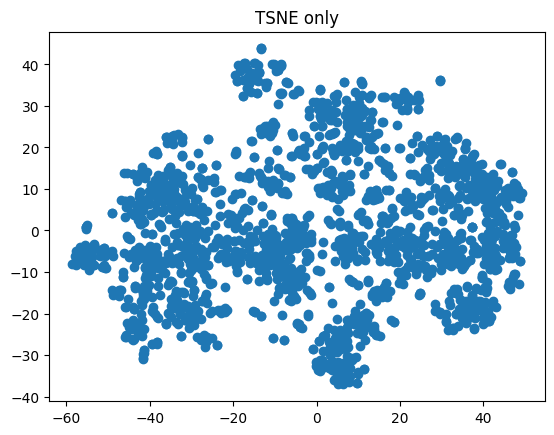

In [243]:
appl_tsne = TSNE(n_components=2, perplexity=50, learning_rate='auto', init='random')
appl_tsne = appl_tsne.fit_transform(appl_embeddings)

fig, ax = plt.subplots()

ax.scatter(x=appl_tsne[:, 0], y=appl_tsne[:, 1])
ax.set_title("TSNE only")

In [278]:
k = 20
model = GaussianMixture(k) # KMeans(k)

model.fit(prop_tsne)

clusters = model.predict(appl_tsne)

Text(0.5, 1.0, 'TSNE only')

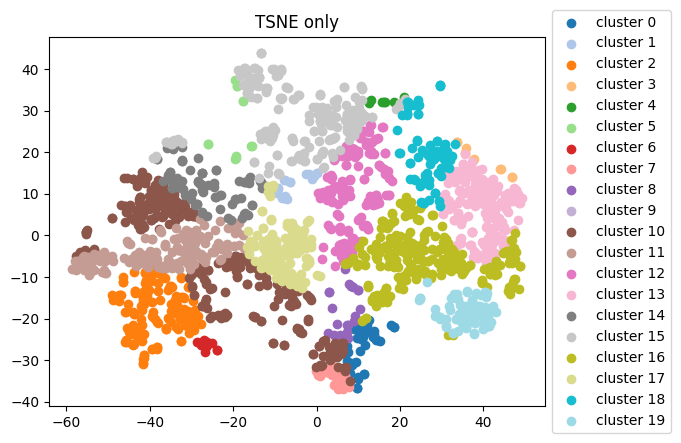

In [279]:
fig, ax = plt.subplots()

cmap = plt.colormaps.get("tab20")
colors = [cmap(i) for i in range(k)]

for i in range(k):
    ax.scatter(x=appl_tsne[clusters==i, 0], y=appl_tsne[clusters==i, 1], c=[colors[i]], label=f"cluster {i}")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("TSNE only")

In [284]:
dist_appl[:2000].iloc[clusters==15]

,Application,Ref Code,Embedding
0,not provided,9557,"[-0.023350298404693604, -0.014436210505664349,..."
9,catalysis,49,"[-0.022852880880236626, 0.0005799133214168251,..."
20,photocatalysis,24,"[-0.017616605386137962, 0.010143905878067017, ..."
59,knoevenagel condensation reaction,9,"[-0.016113320365548134, -0.007988267578184605,..."
75,photocatalytic hydrogen production,8,"[-0.010936281643807888, -1.9879929823218845e-0..."
...,...,...,...
1953,ce−mdip2,1,"[-0.03490802273154259, 0.0004939072532579303, ..."
1954,ch bond functionalization,1,"[-0.010377591475844383, 0.0005363999516703188,..."
1959,chemical fixation of co2 with epoxides to form...,1,"[-0.0010106157278642058, 0.010057352483272552,..."
1968,co2 cycloaddition reactions,1,"[-0.00958356074988842, -0.006922226864844561, ..."


## Water Stability

### Water Stability Extraction Analysis

In [8]:
ws_df = ws_df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"], axis=1)
ws_df.head()

,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg900515j
1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Water Stability,Not provided,NaN,NaN,Not provided,10.1021/cm500700z
2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/ic0201856
3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Water Stability,Not provided,NaN,NaN,The document does not provide explicit informa...,10.1021/cg701232n
4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg901327m


In [9]:
for i in range(len(ws_df)):
    if ws_df.loc[i, "Value"].lower() == "not provided" or ws_df.loc[i, "Value"].lower() == "stable" or ws_df.loc[i, "Value"].lower() == "unstable":
        continue

    if "insoluble" in ws_df.loc[i, "Value"].lower():
        ws_df.loc[i, "Value"] = "Stable"
    else:
        ws_df.loc[i, "Value"] = "Unstable"

ws_df["Value"].unique()

array(['Not provided', 'Unstable', 'Stable'], dtype=object)

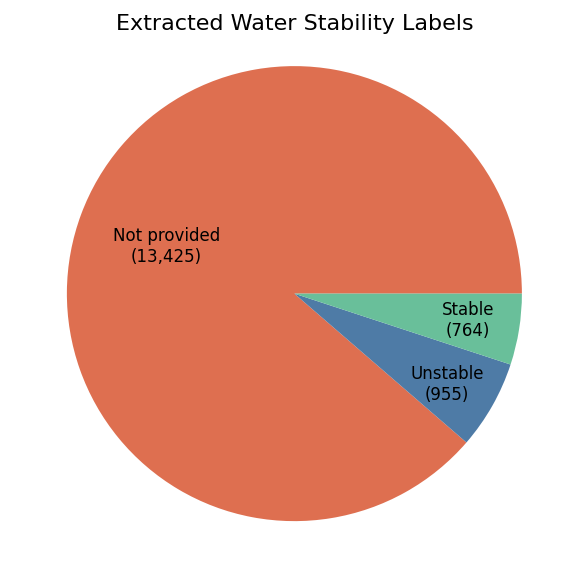

In [614]:
pie_chart_data = ws_df["Value"].value_counts()

labels = pie_chart_data.index
sizes = pie_chart_data.values

#labels = [f"{label}\n{size:,}" for label, size in zip(labels, sizes)]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_title("Extracted Water Stability Labels", fontsize=16, y=0.95)


wedges, texts, autotexts = ax.pie(sizes,
       autopct= lambda pct: f"{int(round(pct*sum(sizes))/100):,}", colors=["#DE6F50", "#4E7BA6", "#69BF9A"], )

for i in range(len(autotexts)):
    autotexts[i].set_text(f"{labels[i]}\n({autotexts[i].get_text()})")
    autotexts[i].set_fontsize(12)

    if i == 1:
        autotexts[i].set_position(np.array(autotexts[i].get_position())+np.array([0.15, -0.1]))
    elif i == 2:
        autotexts[i].set_position(np.array(autotexts[i].get_position())+np.array([0.17, -0.02]))

plt.tight_layout(rect=[0,0,1,1])

plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Labels.svg")

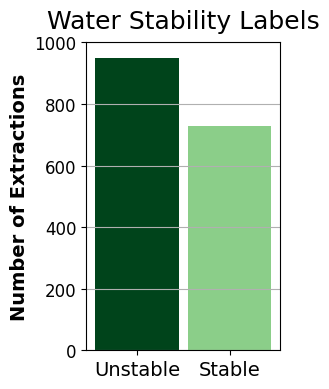

In [656]:
pie_chart_data = ws_df.loc[ws_df["Value"].apply(lambda x: x.lower() != "not provided"),"Value"].value_counts()

labels = pie_chart_data.index
sizes = pie_chart_data.values
pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(3, 4))

ax.bar(pos, sizes, align='center', width=0.9, color=["#00441b", "#8bce89"])
ax.set_xticks(pos, labels=labels, fontsize=14)
ax.set_ylabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='y', which='major')
ax.set_yticks(np.linspace(0, 1000, 6), [f"{i:0n}" for i in np.linspace(0, 1000, 6)], fontsize=12)
ax.set_title("Water Stability Labels", fontsize=18, y=1.02)


plt.tight_layout(rect=[0,0,1,1])
plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Labels.svg")

In [491]:
np.sum(sizes)

1719

### Setting up data sets

In [336]:
ws24s_df = ws24_df[ws24_df["data_set"]=="WS24s"].merge(ws24full_df[["DOI", "refcode"]], how="left", left_on="MOF_name", right_on="refcode")
ws24s_df = ws24s_df.merge(doi_pub_df, how="left", right_on="DOI", left_on="DOI")
ws24s_df

,MOF_name,data_set,water_label,acid_label,base_label,boiling_label,Di,Df,Dif,VSA,...,f-lig-Z-1,f-lig-Z-2,f-lig-Z-3,f-lig-chi-0,f-lig-chi-1,f-lig-chi-2,f-lig-chi-3,DOI,refcode,Publisher
0,ACOFUU,WS24s,2,0,0,0,7.99458,6.67411,7.99458,2280.100,...,4616.0,6536.0,7248.000000,540.553600,1176.93200,1966.53440,2565.196800,10.1002/ejic.200501060,ACOFUU,Wiley
1,ACOGAB,WS24s,2,0,0,0,5.20086,3.89327,4.83563,1877.510,...,4616.0,6536.0,7248.000000,540.553600,1176.93200,1966.53440,2565.196800,10.1002/ejic.200501060,ACOGAB,Wiley
2,ACOGEF,WS24s,2,0,0,0,5.20116,3.94888,4.87431,1842.000,...,4616.0,6536.0,7248.000000,540.553600,1176.93200,1966.53440,2565.196800,10.1002/ejic.200501060,ACOGEF,Wiley
3,ADABUE,WS24s,4,1,1,1,4.54949,3.31506,4.54949,772.133,...,940.0,1222.0,957.333333,106.017633,214.75240,320.45220,323.706533,10.1002/anie.201202992,ADABUE,Wiley
4,AFEJUQ,WS24s,2,0,0,0,5.87037,4.28862,5.87037,2044.710,...,1080.0,1400.0,1288.000000,122.228200,268.82100,406.22000,458.812000,10.1021/ja0113192,AFEJUQ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,ZOZJIJ,WS24s,3,0,0,0,7.74094,3.27474,7.74094,1935.410,...,2456.0,2416.0,2196.000000,121.601000,447.94580,439.62640,400.248000,10.1021/ic5021302,ZOZJIJ,ACS
907,ZOZJOP,WS24s,2,0,0,0,7.62913,3.12841,7.62913,1839.500,...,2456.0,2416.0,2196.000000,121.601000,447.94580,439.62640,400.248000,10.1021/ic5021302,ZOZJOP,ACS
908,ZULNAX,WS24s,4,1,1,1,10.24563,4.97599,10.22202,2001.280,...,646.8,701.0,167.000000,60.975760,142.49136,191.25356,94.181480,10.1002/chem.201501337,ZULNAX,NaN
909,ZZZRNQ02,WS24s,1,0,0,0,2.24665,1.53550,2.24406,0.000,...,300.0,362.0,96.000000,51.192200,81.75300,121.45520,90.816000,10.1002/zaac.201200269,ZZZRNQ02,Wiley


In [666]:
correct_ws_df = pd.read_csv("Fixed_Water_Stability.csv").drop("Unnamed: 0", axis=1)

correct_ws_df = correct_ws_df.merge(doi_pub_df, how='left', right_on="DOI", left_on="Reference").drop("DOI", axis=1)

correct_ws_df["Property"] = pd.Series(["water stability" for i in range(len(correct_ws_df))])

In [337]:
ws24_df["WS Stability"] = ws24_df["water_label"].apply(lambda x: "stable" if x>2 else "unstable")

In [338]:
joined_ws_chemunity_df = ws24_df.loc[ws24_df["data_set"]=="WS24s",["MOF_name", "WS Stability"]].merge(ws_df[["Ref Code", "Value", "Summary", "Reference"]], how="inner", left_on="MOF_name", right_on="Ref Code")

In [339]:
joined_ws_chemunity_df = joined_ws_chemunity_df.rename({"Value": "ChemUnity Stability", "Summary": "ChemUnity Summary"}, axis=1)
len(joined_ws_chemunity_df["Reference"].unique())

218

### Compare sets using CSD Ref Codes

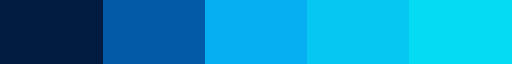

In [10]:
from matplotlib_venn import venn3
from matplotlib_venn.layout.venn3 import cost_based
from pypalettes import load_cmap

palette = load_cmap('Aluterus_scriptus', cmap_type="discrete")
colors = palette.colors

palette

In [11]:
core_qmof_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/CoRE_QMOF_expanded_w_synonyms (1).csv")
core_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/core_public.csv")
qmof_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/qmof.csv")

/tmp/ipykernel_841/60610147.py:3: DtypeWarning: Columns (40,41,43,44,45,46,47,49,50,51,52,53,55,56,57,65,66,67,68,69,77,78,79,80,81,89,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  qmof_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/qmof.csv")


In [12]:
core_df["filename"] = core_df["filename"].apply(lambda x: x.split("_")[0])

In [13]:
qmof_df["name"] = qmof_df["name"].apply(lambda x: x.split("_")[0])

In [14]:
core_qmof_df["Origin"] = core_qmof_df["CH4 uptake at HP (mol/kg)"].apply(lambda x: "qmof" if np.isnan(x) else "core")

In [22]:
input_df = core_qmof_df[["CSD code", "DOI"]].merge(doi_pub_df, how='left', right_on="DOI", left_on="DOI")
input_df.loc[~input_df["Publisher"].isna(), "Publisher"].value_counts()

Publisher
RSC         5216
ACS         4755
Elsevier    3818
Wiley       2319
IUCr        1170
Name: count, dtype: int64

<b>sets of CSD Ref Code from each data set

In [345]:
core = set(core_df["filename"])
qmof = set(qmof_df["name"])
core_qmof_set = set(core_qmof_df["CSD code"])
chemunity_set = set(ws_df.loc[ws_df["Ref Code"] != "not provided", "Ref Code"])
ws_chemunity_subset = set(ws_df.loc[ws_df["Value"] != "Not provided","Ref Code"])
ws24s_set = set(ws24s_df["refcode"])

CoRE-2019 and QMOF from their respective sources

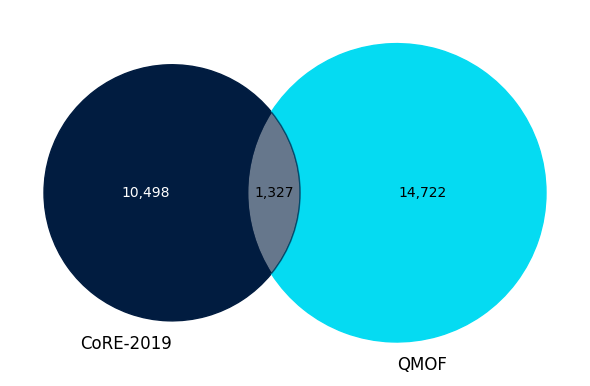

In [346]:
fig, ax = plt.subplots(figsize=(6,6))
v = venn2((core, qmof), set_labels=["CoRE-2019", "QMOF"])

# CoRE-2019
v.get_patch_by_id('10').set_color(colors[0])
v.get_patch_by_id('10').set_alpha(1)
v.get_label_by_id('10').set_text(f"{len(core)-len(core & qmof):,}")
v.get_label_by_id('10').set_color("white")


# QMOF
v.get_patch_by_id('01').set_color(colors[-1])
v.get_patch_by_id('01').set_alpha(1)
v.get_label_by_id('01').set_text(f"{len(qmof)-len(core & qmof):,}")


# Intersection
v.get_patch_by_id('11').set_color(colors[0])
v.get_patch_by_id('11').set_alpha(0.6)
v.get_label_by_id('11').set_text(f"{len(core & qmof):,}")

plt.tight_layout()

CoRE-2019 and QMOF after removing ones without clean structures in CoRE and ones that are not in CSD

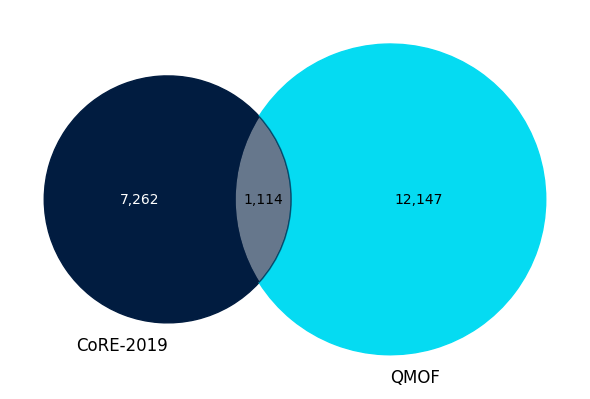

In [347]:
fig = plt.subplots(figsize=(6,6))
intersection_size = len(core_qmof_df.loc[(core_qmof_df["Origin"]=="core") * (~np.isnan(core_qmof_df["Band gap (eV)"])), "CSD code"].unique())
core_only = len(core_qmof_df.loc[core_qmof_df["Origin"]=="core", "CSD code"].unique()) - intersection_size
qmof_only = len(core_qmof_df.loc[core_qmof_df["Origin"]=="qmof", "CSD code"].unique())

subset_sizes = (core_only, qmof_only, intersection_size)
v = venn2(subset_sizes, set_labels=["CoRE-2019", "QMOF"])

# CoRE-2019
v.get_patch_by_id('10').set_color(colors[0])
v.get_patch_by_id('10').set_alpha(1)
v.get_label_by_id('10').set_text(f"{core_only:,}")
v.get_label_by_id('10').set_color("white")


# QMOF
v.get_patch_by_id('01').set_color(colors[-1])
v.get_patch_by_id('01').set_alpha(1)
v.get_label_by_id('01').set_text(f"{qmof_only:,}")


# Intersection
v.get_patch_by_id('11').set_color(colors[0])
v.get_patch_by_id('11').set_alpha(0.6)
v.get_label_by_id('11').set_text(f"{intersection_size:,}")

plt.tight_layout()

CoRE/QMOF Unique DOIs

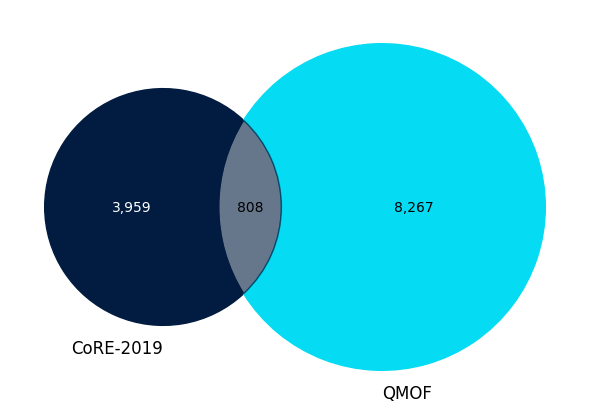

In [348]:
fig = plt.subplots(figsize=(6,6))
intersection_size = len(core_qmof_df.loc[(core_qmof_df["Origin"]=="core") * (~np.isnan(core_qmof_df["Band gap (eV)"])), "DOI"].unique())
core_only = len(core_qmof_df.loc[core_qmof_df["Origin"]=="core", "DOI"].unique()) - intersection_size
qmof_only = len(core_qmof_df.loc[core_qmof_df["Origin"]=="qmof", "DOI"].unique())

subset_sizes = (core_only, qmof_only, intersection_size)
v = venn2(subset_sizes, set_labels=["CoRE-2019", "QMOF"])

# CoRE-2019
v.get_patch_by_id('10').set_color(colors[0])
v.get_patch_by_id('10').set_alpha(1)
v.get_label_by_id('10').set_text(f"{core_only:,}")
v.get_label_by_id('10').set_color("white")

# QMOF
v.get_patch_by_id('01').set_color(colors[-1])
v.get_patch_by_id('01').set_alpha(1)
v.get_label_by_id('01').set_text(f"{qmof_only:,}")

# Intersection
v.get_patch_by_id('11').set_color(colors[0])
v.get_patch_by_id('11').set_alpha(0.6)
v.get_label_by_id('11').set_text(f"{intersection_size:,}")

plt.tight_layout()

Compare CoRE and QMOF to ChemUnity

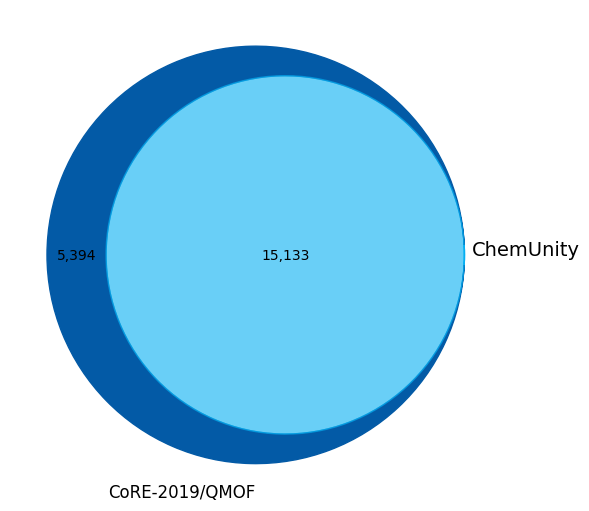

In [349]:
fig = plt.subplots(figsize=(6,6))

core_qmof_only = len(core_qmof_set-chemunity_set)
chemunity_only = len(chemunity_set)

v = venn2((core_qmof_only, 0, chemunity_only), set_labels=["CoRE-2019/QMOF", ""])

# CoRE-2019/QMOF
v.get_patch_by_id('10').set_color(colors[1])
v.get_patch_by_id('10').set_alpha(1)
v.get_label_by_id('10').set_text(f"{core_qmof_only:,}")

# ChemUnity
v.get_patch_by_id('01').set_color(colors[2])
v.get_patch_by_id('01').set_alpha(1)
v.get_label_by_id('01').set_text("")
plt.annotate("ChemUnity", xy=[0.55, 0], fontsize=14)

# Intersection
v.get_patch_by_id('11').set_color(colors[2])
v.get_patch_by_id('11').set_alpha(0.6)
v.get_label_by_id('11').set_text(f"{chemunity_only:,}")

plt.tight_layout()

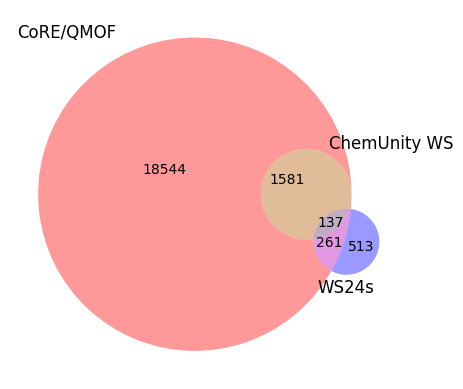

In [324]:
venn3((core_qmof_set, ws_chemunity_subset, ws24s_set), set_labels = ["CoRE/QMOF", "ChemUnity WS", "WS24s"])

In [356]:
needed = (core_qmof_set & ws24s_set) - ws_chemunity_subset


ws_df.merge(right=doi_pub_df, how="left", right_on="DOI", left_on="Reference").loc[ws_df["Ref Code"].apply(lambda x: x in needed), ["MOF Name", "Ref Code", "Reference", "Publisher"]].to_csv("missing_labels.csv")

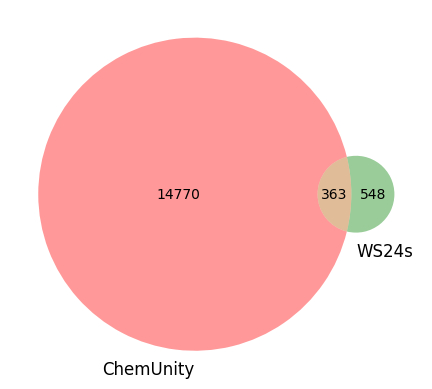

In [110]:
venn2((chemunity_set, ws24s_set), set_labels=["ChemUnity", "WS24s"])

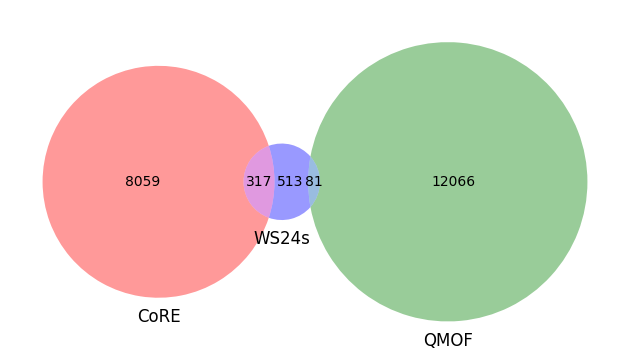

In [113]:
venn3((core, qmof, ws24s_set), set_labels=["CoRE", "QMOF", "WS24s"])
plt.tight_layout()

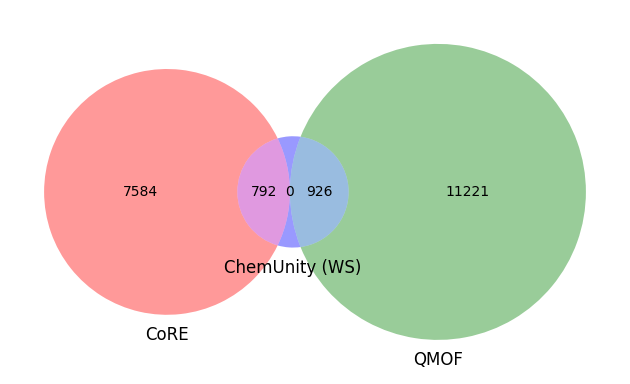

In [115]:
venn3((core, qmof, ws_chemunity_subset), set_labels=["CoRE", "QMOF", "ChemUnity (WS)"])
plt.tight_layout()

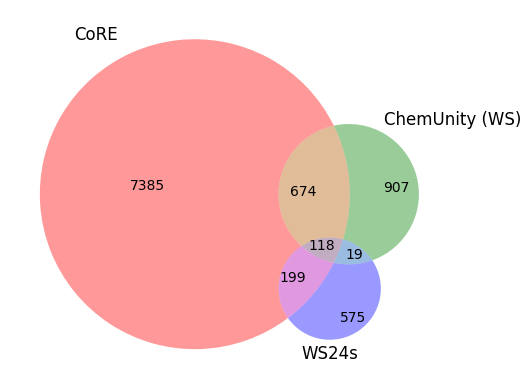

In [116]:
venn3((core, ws_chemunity_subset, ws24s_set), set_labels=["CoRE", "ChemUnity (WS)", "WS24s"])

In [124]:
core_and_ws24s = ws24s_set & core

core_and_ws24s_not_chemunity_ws = core_and_ws24s - ws_chemunity_subset

#### I can these DOIs and run again :)

In [125]:
ws24s_df.loc[ws24s_df["MOF_name"].apply(lambda x: x in core_and_ws24s_not_chemunity_ws),"Publisher"].value_counts()

Publisher
ACS      163
Wiley     24
Name: count, dtype: int64

In [140]:
ws24s_df.loc[ws24s_df["MOF_name"].apply(lambda x: x in core_and_ws24s_not_chemunity_ws),"DOI"].unique()

array(['10.1002/ejic.200501060', '10.1021/acs.cgd.6b00429',
       '10.1021/acs.inorgchem.6b00935', '10.1021/cg101494t',
       '10.1021/acs.cgd.6b00274', '10.1021/acs.inorgchem.5b01900',
       '10.1002/chem.201501976', '10.1002/zaac.201200269',
       '10.1007/s10870-013-0473-3', '10.1002/ejic.201500069',
       '10.1007/s10904-015-0198-1', '10.1021/acs.cgd.5b01155',
       '10.1021/ic051810k', '10.1021/cg400486q', '10.1021/ic800008f',
       '10.1021/cg8008859', '10.1021/cg800896k', '10.1021/cg900828v',
       '10.1038/ncomms13645', '10.1021/acs.inorgchem.6b01869',
       '10.1021/ic048159q', '10.1021/cg060087l', '10.1021/cg501879w',
       '10.1021/cg034116t', '10.1021/acs.cgd.6b00548',
       '10.1021/acs.cgd.6b00626', '10.1021/acs.cgd.6b01031',
       '10.1021/ic035207i', '10.1021/acs.cgd.6b00912',
       '10.1002/ejic.200400438', '10.1021/ic0494962', '10.1021/ja0437095',
       '10.1002/zaac.201300677', '10.1021/ic801846h',
       '10.1002/chem.200802691', '10.1021/cg100127w',
 

### Comparing Data Sets using DOI

In [141]:
core = set(core_qmof_df.loc[core_qmof_df["Origin"]=="core", "DOI"])
qmof = set(core_qmof_df.loc[core_qmof_df["Origin"]=="qmof", "DOI"])
core_qmof_set = set(core_qmof_df["DOI"])
chemunity_set = set(ws_df["Reference"])
ws_chemunity_subset = set(ws_df.loc[ws_df["Value"] != "Not provided","Reference"])
ws24s_set = set(ws24s_df["DOI"])

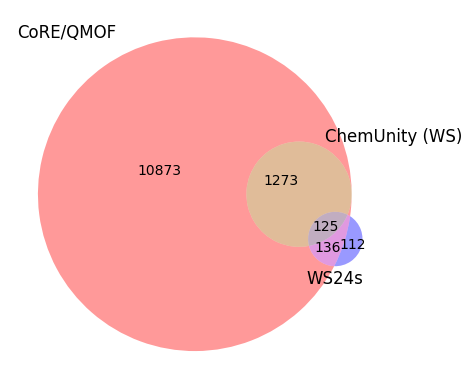

In [142]:
venn3((core_qmof_set, ws_chemunity_subset, ws24s_set), set_labels=["CoRE/QMOF", "ChemUnity (WS)", "WS24s"])

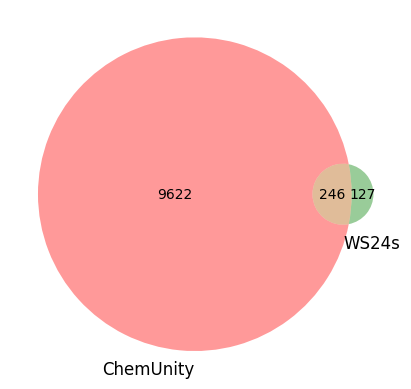

In [143]:
venn2((chemunity_set, ws24s_set), set_labels=["ChemUnity", "WS24s"])

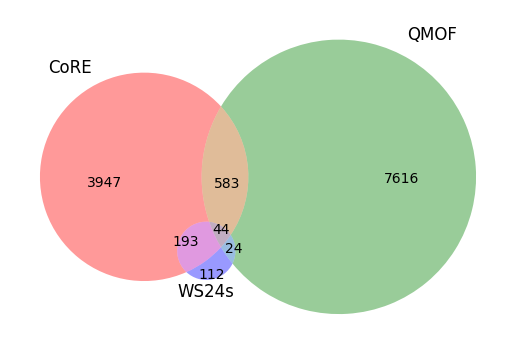

In [144]:
venn3((core, qmof, ws24s_set), set_labels=["CoRE", "QMOF", "WS24s"])

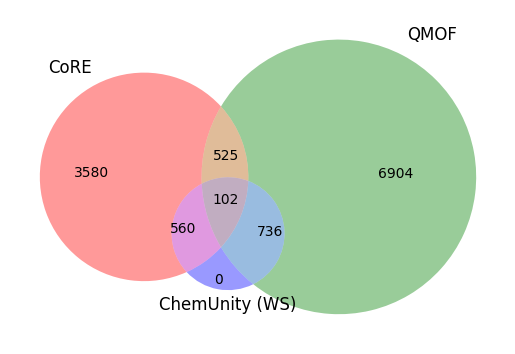

In [145]:
venn3((core, qmof, ws_chemunity_subset), set_labels=["CoRE", "QMOF", "ChemUnity (WS)"])

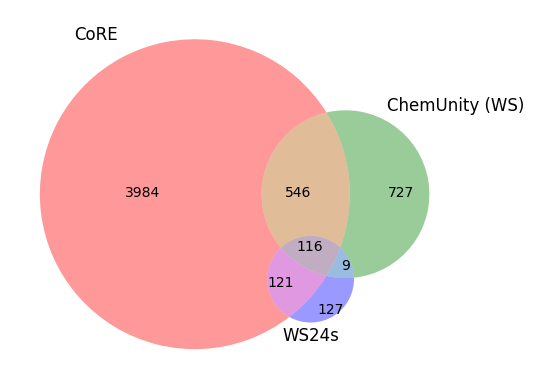

In [146]:
venn3((core, ws_chemunity_subset, ws24s_set), set_labels=["CoRE", "ChemUnity (WS)", "WS24s"])

In [149]:
core_and_ws24s = ws24s_set & core

core_and_ws24s_not_chemunity_ws = core_and_ws24s - ws_chemunity_subset

In [152]:
len(core_and_ws24s)

237

In [157]:
ws24s_df.loc[ws24s_df["DOI"].apply(lambda x: x in core_and_ws24s_not_chemunity_ws),["DOI", "Publisher"]].groupby(by="Publisher")["DOI"].nunique()

Publisher
ACS      93
Wiley    18
Name: DOI, dtype: int64

In [160]:
core_qmof_t = core_qmof_df.merge(doi_pub_df, how="left", right_on="DOI", left_on="DOI")
core_qmof_t[["Publisher", "DOI"]].groupby("Publisher")['DOI'].nunique()

Publisher
ACS         2560
Elsevier    2782
IUCr        1106
RSC         3056
Wiley       1359
Name: DOI, dtype: int64

In [161]:
18/1359

0.013245033112582781

In [162]:
93/2560

0.036328125

### ChemUnity WS Labels CORE_QMOF Distribution

In [23]:
core_qmof_chemunity = ws_df.loc[ws_df["Value"] != "Not provided", ["Ref Code","MOF Name", "Value", "Summary"]].merge(right=core_qmof_df[["CSD code", "Origin"]], how="left", right_on="CSD code", left_on="Ref Code")
core_qmof_chemunity.head(3)

,Ref Code,MOF Name,Value,Summary,CSD code,Origin
0,JUXFOZ,NPC-7-Zn<|>Zn2(TMBDI)(DMF)3,Unstable,The instability of Zn­(II)-based MOFs is a sev...,JUXFOZ,core
1,IZOWAW,ε(trim)<|>ε(trim) 4/3,Unstable,"""The cation exchange has been followed by IR s...",IZOWAW,core
2,XAKYUE,[Mn6(pshz)6(bpea)2(dmf)2]·x(dmf)<|>2,Unstable,The host networks with three-dimensional or on...,XAKYUE,core


## Visualization

### Confusion Matrix (WS24 vs. ChemUnity)

In [572]:
joined_ws_chemunity_df.to_csv("ws24_benchmark_results.csv")

Percent Match b/w ChemUnity and WS24 Water Stability Labels: 78.87%


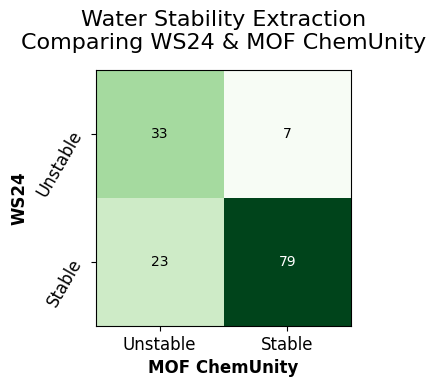

In [673]:
confusion_matrix = np.zeros((2,2))
use_corrected = False

wrong_codes = []
for i in range(len(joined_ws_chemunity_df)):
    chemunity = joined_ws_chemunity_df.loc[i, "ChemUnity Stability"]
        
    ws24 = joined_ws_chemunity_df.loc[i, "WS Stability"]

    if chemunity.lower() == "stable":
        chemunity_index = 1
    else:
        chemunity_index = 0
    
    if ws24.lower() == "stable":
        ws_index = 1
    else:
        ws_index = 0
    
    if ws_index != chemunity_index:
        wrong_codes.append(joined_ws_chemunity_df.loc[i, ["refcode", "DOI"]])



    confusion_matrix[ws_index, chemunity_index] += 1

print(f"Percent Match b/w ChemUnity and WS24 Water Stability Labels: {np.trace(confusion_matrix)/np.sum(confusion_matrix):0.2%}")

fig, ax = plt.subplots(figsize=(4,4))

ax.imshow(confusion_matrix, cmap="Greens")
ax.set_title("Water Stability Extraction\nComparing WS24 & MOF ChemUnity", fontsize=16, y=1.05)
ax.set_xticks(ticks=np.arange(2), labels=["Unstable", "Stable"], fontsize=12)
ax.set_yticks(ticks=np.arange(2), labels=["Unstable", "Stable"], fontsize=12, rotation=60)
ax.set_xlabel("MOF ChemUnity", fontsize=12, fontweight="bold")
ax.set_ylabel("WS24", fontsize=12, fontweight="bold")

for j in range(2):
    for i in range(2):
        if i == 1 and j == 1:
            ax.text(j, i, f"{confusion_matrix[i,j]:0n}", ha="center", va="center", color="white")
            continue
        ax.text(j, i, f"{confusion_matrix[i,j]:0n}", ha="center", va="center", color="black")

plt.tight_layout(rect=[0,0,1,1])

plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_WS24.svg")

In [637]:
wrong_codes = pd.DataFrame(wrong_codes)

In [641]:
wrong_codes.to_csv("ws24_mistakes.csv")

### ChemUnity WS Labels Origin

In [31]:
core_qmof_chemunity["Origin"].value_counts().index

Index(['qmof', 'core'], dtype='object', name='Origin')

Text(0, 0.5, 'Number of Labels')

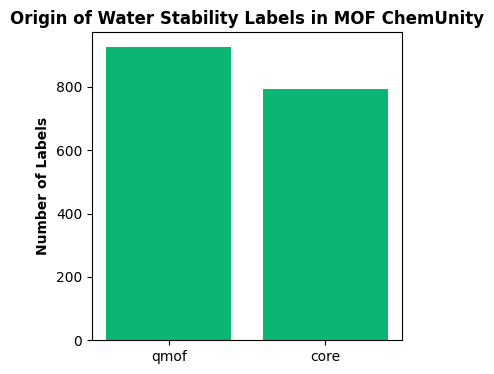

In [39]:
plot_data = core_qmof_chemunity["Origin"].value_counts()

labels = list(plot_data.index)
values = plot_data.values

pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(4,4))

ax.bar(pos, values, color="#0db575")
ax.set_xticks(pos, labels)
ax.set_title("Origin of Water Stability Labels in MOF ChemUnity", fontweight="bold")

ax.set_ylabel("Number of Labels", fontweight="bold")

## Matching Results

### Preparation

In [127]:
publishers = list(doi_pub_df["Publisher"].unique())

In [128]:
matching_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/water_stability.csv")

input_df = pd.read_csv("/mnt/c/Users/Amro/Downloads/CoRE_QMOF_expanded_w_synonyms (1).csv")

In [129]:
matching_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
0,0,0,0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg900515j
1,1,1,1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Water Stability,Not provided,NaN,NaN,Not provided,10.1021/cm500700z
2,2,2,2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/ic0201856
3,3,3,3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Water Stability,Not provided,NaN,NaN,The document does not provide explicit informa...,10.1021/cg701232n
4,4,4,4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg901327m


In [130]:
input_df.head()

,CSD code,Chemical Name,Synonyms,a,b,c,alpha,beta,gamma,Space group,...,CH4 uptake at HP (mol/kg),logKH_CO2,Band gap (eV),DOI,Journal,Metal types,MOFid,smiles_linker,Molecular formula,Crystal system
0,QONLAI,catena-(tetrakis(μ3-5-(4-Pyridyl)tetrazolato)-...,[],13.1110,14.7910,15.6710,90.000,92.625,90.000,P21/n,...,8.403936,-4.376034,0.485636,10.1021/ic5008457,Journal(Inorganic Chemistry),Cu,[Cu].[N][N][N].n1ccc(cc1)C1=NN=N[N]1 MOFid-v1....,"['[N][N][N]', 'n1ccc(cc1)C1=NN=N[N]1']",C48Cu6H32N52,monoclinic
1,BUKYAJ,"catena-[(μ-1,4-dioxane)-bis(μ-pyridin-4-olato)...",[],7.1555,12.4238,11.7575,90.000,91.782,90.000,P21/c,...,6.642334,-3.589223,3.866396,10.1021/acs.cgd.5b00358,Journal(Crystal Growth and Design),Li,O1CCOCC1.[Li].[O]c1ccncc1 MOFid-v1.fsc.cat1;BU...,"['O1CCOCC1', '[O]c1ccncc1']",C28H32Li4N4O8,monoclinic
2,QAGDIO,"catena-(bis(μ16-5-(4-(4-(tris(4-(1-(3,5-Dicarb...",[],46.0575,20.9442,14.1001,90.000,90.000,90.000,C222,...,13.095273,-4.533132,0.340761,10.1021/jacs.5b13335,Journal(Journal of the American Chemical Society),Cu,[Cu][Cu].[O-]C(=O)c1cc(cc(c1)C(=O)[O-])n1nnc(c...,['[O-]C(=O)c1cc(cc(c1)C(=O)[O-])n1nnc(c1)c1ccc...,C260Cu16H128N48O64,orthorhombic
3,XUYDIF,"catena-((μ4-3-(2-pyridyl)-4,5-bis(4-pyridyl)-1...",[],9.5990,11.0250,12.5710,86.328,81.705,79.834,P-1,...,1.374730,-4.342234,1.785168,10.1016/j.inoche.2010.04.015,Journal(Inorganic Chemistry Communications),Cd,[Cd].[N][N][N].n1ccc(cc1)c1nnc(n1c1ccncc1)c1cc...,"['[N][N][N]', 'n1ccc(cc1)c1nnc(n1c1ccncc1)c1cc...",C34Cd4H24N36,triclinic
4,YEZFIU,catena-((μ3-bis(2-(Tetrazol-5-yl)ethyl) ether)...,[],24.9900,24.9900,13.0478,90.000,90.000,120.000,R-3,...,5.797507,-4.685284,4.751611,10.1021/ja3063138,Journal(Journal of the American Chemical Society),Zn,O(CCC1=NN=N[N]1)CCC1=NN=N[N]1.[Zn] MOFid-v1.ER...,['O(CCC1=NN=N[N]1)CCC1=NN=N[N]1'],C36H48N48O6Zn6,trigonal


In [131]:
matching_df = matching_df.merge(doi_pub_df, how="left", right_on="DOI", left_on="Reference")

In [132]:
matching_df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference,DOI,Publisher
0,0,0,0,Cd(L2)(SCN)2<|>compound 10,DUHDOA,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg900515j,10.1021/cg900515j,ACS
1,1,1,1,InEu(BTB)7/3(H2O)2·(DEF)6<|>SMOF-2<|>compound 1,KUNSUJ,Water Stability,Not provided,NaN,NaN,Not provided,10.1021/cm500700z,10.1021/cm500700z,ACS
2,2,2,2,[AuS2PPh(OC5H9)]2<|>2,OGIJIX,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/ic0201856,10.1021/ic0201856,ACS
3,3,3,3,[Cd(μ-tp)(μ-bpp)(H2O)]·nnH2O<|>3,WOCKOP,Water Stability,Not provided,NaN,NaN,The document does not provide explicit informa...,10.1021/cg701232n,10.1021/cg701232n,ACS
4,4,4,4,[CuBr2(L1)]·nn(MeOH)<|>complex 3,CURYAQ,Water Stability,Not provided,NaN,NaN,The document does not provide specific informa...,10.1021/cg901327m,10.1021/cg901327m,ACS


In [133]:
input_df = input_df.merge(doi_pub_df, how="left", right_on="DOI", left_on="DOI")

In [134]:
input_df["Publisher"].unique()

array(['ACS', 'Elsevier', 'RSC', nan, 'Wiley', 'IUCr'], dtype=object)

In [135]:
input_df = input_df[input_df["Publisher"].apply(lambda x: x in publishers)]

In [136]:
input_df["Publisher"].unique()

array(['ACS', 'Elsevier', 'RSC', 'Wiley', 'IUCr'], dtype=object)

In [137]:
input_df["Publisher"].value_counts().sort_values(ascending=False)

Publisher
RSC         5216
ACS         4755
Elsevier    3818
Wiley       2319
IUCr        1170
Name: count, dtype: int64

### Bar Plot

90.49421661409043


/tmp/ipykernel_855/2902299705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_1[1] -= 890


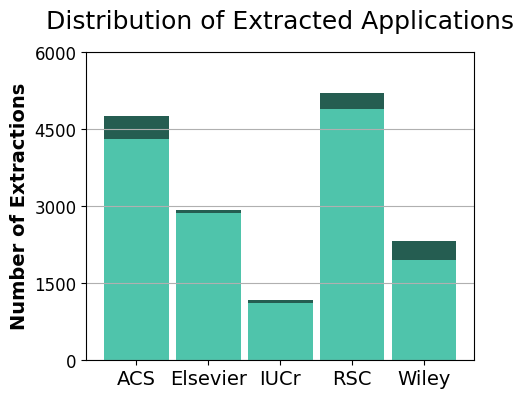

In [138]:
match_data = matching_df[["Ref Code", "Publisher"]].groupby("Publisher").count().reset_index()
input_data = input_df[["CSD code", "Publisher"]].groupby("Publisher").count().reset_index()


fig, ax = plt.subplots(figsize=(5, 4))

labels = [i for i in match_data["Publisher"]]
pos = np.arange(len(labels))

values_2 = match_data["Ref Code"]
values_1 = input_data["CSD code"]
values_1[1] -= 890

print(values_2[0]/values_1[0]*100)

ax.bar(pos, values_1, align='center', width=0.9, color="#255d51")
ax.bar(pos, values_2, align='center', width=0.9, color="#4fc4ab")
ax.set_xticks(pos, labels=labels, fontsize=14)
ax.set_ylabel("Number of Extractions", fontsize=14, fontweight="bold")
ax.grid(visible=True, axis='y', which='major')
ax.set_yticks(np.linspace(0, 6000, 5), [f"{i:0n}" for i in np.linspace(0, 6000, 5)], fontsize=12)
ax.set_title("Distribution of Extracted Applications", fontsize=18, y=1.05)


plt.savefig("/mnt/c/Users/Amro/Downloads/matching.svg")